In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset shape: (2000, 5)
First few rows:
                                         productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping  

Missing values:
 productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64


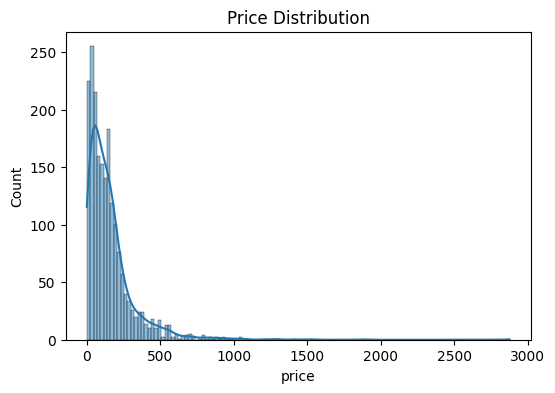

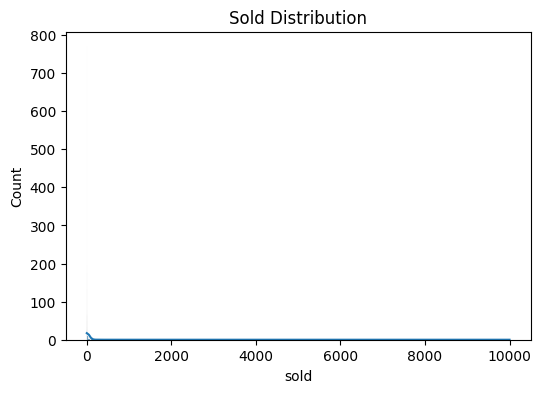

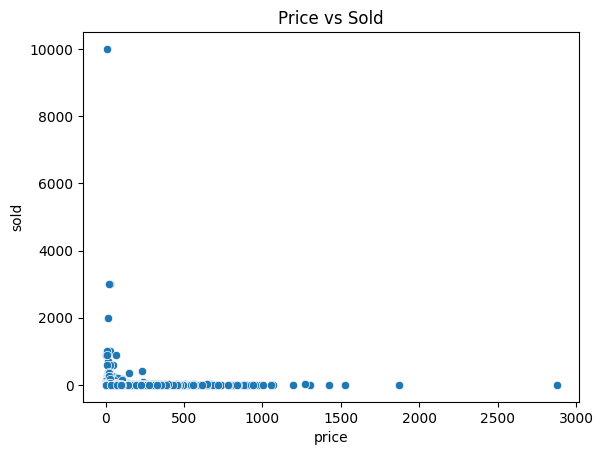


🔍 Model Evaluation:
Linear Regression -> MSE: 13557.91, R2: -1.47
Random Forest     -> MSE: 17350.74, R2: -2.16


In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Step 2: Load Dataset (Assuming it's uploaded manually in Colab session)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ecommerce_furniture_dataset_2024.csv')

# Step 3: Initial Overview
print("Dataset shape:", df.shape)
print("First few rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

# Step 4: Drop originalPrice (has too many missing values)
df.drop(['originalPrice'], axis=1, inplace=True)

# Step 5: Clean tagText
df['tagText'] = df['tagText'].fillna('others')
df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')

# Encode tagText
le = LabelEncoder()
df['tagText'] = le.fit_transform(df['tagText'])

# Step 6: Clean price (convert to float)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Step 7: Visualize Data
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['sold'], kde=True)
plt.title("Sold Distribution")
plt.show()

sns.scatterplot(x='price', y='sold', data=df)
plt.title("Price vs Sold")
plt.show()

# Step 8: TF-IDF Vectorization for productTitle
tfidf = TfidfVectorizer(max_features=100)
title_tfidf = tfidf.fit_transform(df['productTitle'])

# Convert to DataFrame and merge
title_df = pd.DataFrame(title_tfidf.toarray(), columns=tfidf.get_feature_names_out())
df = pd.concat([df.drop('productTitle', axis=1).reset_index(drop=True), title_df], axis=1)

# Step 9: Train-Test Split
X = df.drop('sold', axis=1)
y = df['sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Model Training
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Step 11: Evaluation
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n🔍 Model Evaluation:")
print(f"Linear Regression -> MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")
print(f"Random Forest     -> MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")